In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Supervised ML Algorithms**

> Almost every ml algorithm has its version for classification and regression.

***

### **K-Nearest Neighbors**: 

- Building it consists only of storing the trainning dtaset. 
- To make a prediction for a new datapoint, the algorithm finds the closest datapoints in the trainning set (the nearest neighbors) and simply make a count to classify or take the average of those values as the output.

#### **Classifier**:

In [2]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Como puede notarse, este dataset es diferente al Iris ya que la distribucion de las clases no es igual:

> :Class Distribution: 212 - Malignant, 357 - Benign

Por esto debe ajustarse el parametro de stratificación (para propositos de aprendizaje, supongo)

Text(0, 0.5, 'Accuracy')

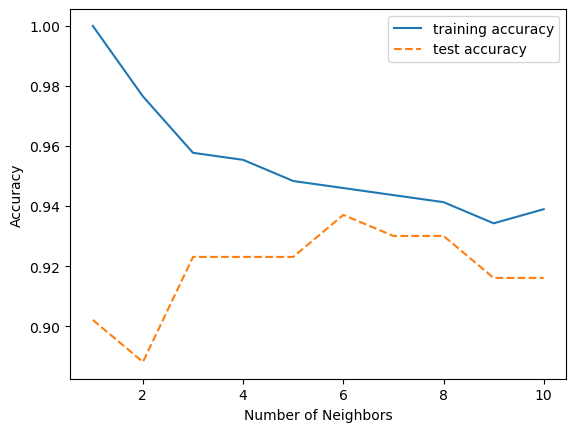

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer_data.data, cancer_data.target,
    stratify=cancer_data.target, 
    random_state=66
    )

training_accuracy = []
test_accuracy = []

# Trying different numbers of neighbors
# from 1 to 10
neighbors = range(1, 11)

for n in neighbors:
    knc = KNeighborsClassifier(n_neighbors=n)
    knc.fit(X_train, y_train)
    # Getting accuracy on training set
    training_accuracy.append(knc.score(X_train, y_train))
    # Getting accuracy on test set
    test_accuracy.append(knc.score(X_test, y_test))

# Plotting to observe the how accuracy changes by
# adjusting the number of neighbors to consider
plt.plot(neighbors, training_accuracy, label='training accuracy')
plt.plot(neighbors, test_accuracy, label='test accuracy', ls='--')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

In [7]:
print('Max Accuracy: {:.2f}'.format(np.max(test_accuracy)))

Max Accuracy: 0.94
